In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import data_utils as dutils
from pathlib import Path
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def get_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    print(f"RMSE Train: {res[0]} | RMSE Test: {res[1]} \n R2 Train: {res[2]} | R2 Test: {res[3]}")
    return res

In [2]:
df = dutils.loadData()
X_train, y_train, X_val, y_val = dutils.getTrainTestSets(df)

In [ ]:
X_train, y_train

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [88]:
df = dutils.loadData()
emo_df = dutils.loadEmoData()
emo_df.fillna(0, inplace=True)
mergedDf = df.merge(emo_df, right_index=True, left_index=True)
new_df = mergedDf.drop(columns=["CODNEG"])
new_df

,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,SUR,ANG,JOY,FEA,TRU,ANT,SAD,DIS
2020-05-04,75.17,76.30,74.77,75.44,76.10,76.10,76.12,0.001368,0.000000,0.015048,0.060192,0.009576,0.000000,0.025992,0.067031
2020-05-05,77.00,78.14,76.20,77.24,76.54,76.54,76.69,0.000000,0.000000,0.010558,0.055807,0.007541,0.001508,0.036199,0.075415
2020-05-06,76.82,77.06,75.15,76.04,76.20,76.18,76.20,0.000000,0.000000,0.033183,0.058824,0.006033,0.004525,0.036199,0.093514
2020-05-07,77.08,77.21,75.17,76.06,75.40,75.40,75.67,0.000000,0.000000,0.018156,0.046089,0.009777,0.000000,0.037709,0.078212
2020-05-08,76.94,77.58,76.50,77.00,77.43,77.40,77.43,0.001650,0.000000,0.021452,0.051155,0.008251,0.001650,0.046205,0.107261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,103.67,105.85,103.51,105.13,105.72,105.72,105.75,0.000000,0.000887,0.014184,0.044326,0.004433,0.000000,0.033688,0.129433
2020-11-25,105.47,106.49,105.16,105.85,105.83,105.83,105.97,0.001337,0.000000,0.021390,0.036096,0.008021,0.000000,0.016043,0.069519
2020-11-26,105.39,106.11,105.25,105.81,106.02,106.02,106.03,0.000000,0.000000,0.027219,0.046154,0.007101,0.000000,0.018935,0.089941
2020-11-27,106.30,107.41,106.11,106.79,106.44,106.40,106.44,0.001099,0.000000,0.027473,0.038462,0.008791,0.000000,0.023077,0.151648


In [90]:
scaler = MinMaxScaler()
new_df[['PREABE','PREMAX','PREMIN','PREMED','PREOFC','PREOFV', 'PREULT']] = scaler.fit_transform(new_df[['PREABE','PREMAX','PREMIN','PREMED','PREOFC','PREOFV', 'PREULT']])
X_train, y_train, X_val, y_val = dutils.getTrainTestSets(new_df, perc=0.75, with_emotions=True)


,PREABE,PREMAX,PREMIN,PREMED,PREOFC,PREOFV,PREULT,SUR,ANG,JOY,FEA,TRU,ANT,SAD,DIS
2020-10-08,0.559576,0.581522,0.576067,0.588930,0.615264,0.615360,0.618256,0.000000,0.000000,0.016598,0.045643,0.009682,0.001383,0.037344,0.069156
2020-10-09,0.620399,0.602941,0.620866,0.605721,0.599560,0.598925,0.598808,0.001133,0.001133,0.016988,0.061155,0.010193,0.000000,0.035108,0.156285
2020-10-13,0.619464,0.614450,0.625376,0.618470,0.635678,0.632427,0.634881,0.000000,0.000000,0.016949,0.040678,0.006780,0.000000,0.028814,0.057627
2020-10-14,0.647848,0.630754,0.666266,0.651119,0.660490,0.657396,0.659661,0.000000,0.000000,0.018541,0.058096,0.012361,0.000000,0.046972,0.072930
2020-10-15,0.627573,0.628836,0.637402,0.637749,0.652324,0.649178,0.651819,0.000000,0.000000,0.011696,0.046784,0.000000,0.000000,0.017544,0.040936
2020-10-16,0.651279,0.617647,0.652135,0.631530,0.627198,0.623894,0.626725,0.000000,0.001295,0.020725,0.051813,0.007772,0.000000,0.028497,0.089378
2020-10-19,0.649407,0.641624,0.656945,0.651119,0.641646,0.638432,0.641154,0.000000,0.000000,0.026462,0.045961,0.002786,0.002786,0.027855,0.091922
2020-10-20,0.663132,0.666240,0.678894,0.682214,0.694410,0.692162,0.693538,0.001081,0.000000,0.019459,0.043243,0.011892,0.000000,0.023784,0.097297
2020-10-21,0.695571,0.694373,0.707156,0.698694,0.692839,0.690582,0.692911,0.000000,0.000000,0.020071,0.049587,0.012987,0.011806,0.030697,0.061393
2020-10-22,0.699938,0.708440,0.714973,0.714863,0.738065,0.736726,0.737139,0.000000,0.000000,0.026171,0.059229,0.005510,0.000000,0.039945,0.070248


In [100]:
parameters = {
    "kernel": ["rbf", "sigmoid"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    "epsilon": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    }
cv = ShuffleSplit(test_size=0.01, n_splits=1)
grid = GridSearchCV(SVR(), parameters, cv=cv, verbose=0, return_train_score=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.01, train_size=None),
             estimator=SVR(),
             param_grid={'C': [1, 10, 10, 100, 1000],
                         'epsilon': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                     0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1],
                         'kernel': ['rbf', 'sigmoid']},
             return_train_score=True)

In [101]:
import math
pred = grid.best_estimator_.predict(X_val)
get_score(grid.best_estimator_)

RMSE Train: 0.04013236210919703 | RMSE Test: 0.05322724329601825 
 R2 Train: 0.9676367916547011 | R2 Test: 0.8545796119249941


[0.04013236210919703,
 0.05322724329601825,
 0.9676367916547011,
 0.8545796119249941]

In [97]:
arr = [y_val, pred]
pltdata = pd.DataFrame({"Target": y_val, "Pred": pred}, index=X_val.index)

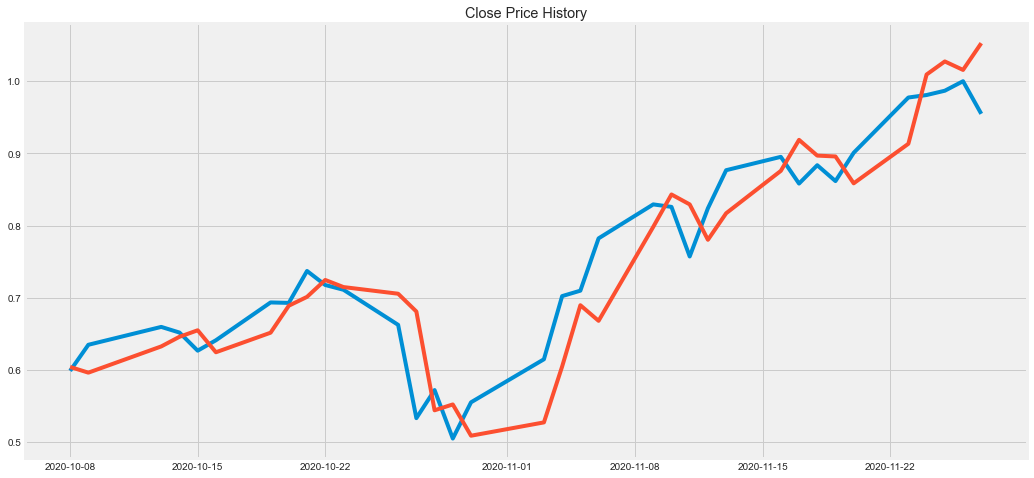

In [98]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(pltdata)
plt.show()